# 以鸢尾花数据集为例，手写BP神经网络解决回归/分类问题

## hints
* 只需要三层神经网络（input, hidden, output）
* 代码中需要体现调参过程

## steps
1. 导入数据
2. 神经元计算
3. 激活函数
4. 激活函数求导函数
5. forward
6. loss bp
7. para update
8. main function : 超参数设置 + 神经网络的搭建与初始化 + 模型训练
9. 评价指标（accurary, precision, recall, F1-score）和验证
10. 可视化（训练损失、准确率，精度，召回率等图像）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris

In [2]:
# 导入数据
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# One-hot编码
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

In [4]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

$$σ(x)=\frac{1}{1+e^{−x}}$$
$$σ′(x)=x⋅(1−x)$$

In [5]:
# 激活函数及其导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
# 余弦退火学习率
def cosine_annealing(epoch, total_epochs, initial_lr):
    return initial_lr * (1 + np.cos(np.pi * epoch / total_epochs)) / 2

In [7]:
# 指数衰减（Exponential Decay）
def exponential_decay(epoch, initial_lr, decay_rate=0.96, decay_steps=100):
    return initial_lr * decay_rate ** (epoch / decay_steps)

In [8]:
# 初始化参数
input_size = X_train.shape[1]
output_size = y_train.shape[1]
initial_lr = 0.1
epochs = 2000

$$z_1 = X W_1 + b_1$$
$$a_1=σ(z_1)$$
$$z_2=a_1W_2+b_2$$
$$a_2=σ(z_2)$$

In [9]:
# 前向传播
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

## Loss使用的是均方误差
$$L=\frac{1}{2m}\sum_{i=1}^m(a_2^{(i)}-y^{(i)})^2$$
其中，$a_2$ 是输出层的激活值，$y$ 是真实标签，$m$ 是样本数量

## sigmoid求导
$$σ'(z)= σ(z)·(1-σ(z))$$

## 各个参数求导后的结果
$$
dz_2 = (a_2 - y) \cdot \sigma'(a_2)
$$

$$
dW_2 = \frac{1}{m} \cdot (a_1^T \cdot dz_2) \quad
$$

$$
db_2 = \frac{1}{m} \cdot \sum dz_2
$$

$$
dz_1 = (dz_2 \cdot W_2^T) \cdot \sigma'(a_1)
$$

$$
dW_1 = \frac{1}{m} \cdot (X^T \cdot dz_1)
$$

$$
db_1 = \frac{1}{m} \cdot \sum dz_1
$$

In [10]:
# 反向传播
def backward(X, y, z1, a1, z2, a2):
    global W1, b1, W2, b2
    # 元素数量
    m = X.shape[0]
    
    # 计算梯度
    dz2 = (a2 - y) * sigmoid_derivative(a2) # 这边这个这样写后面的几个导数都需要导入它，比较方便算
    dW2 = np.dot(a1.T, dz2) / m # np.dot(a1.T, dz2) 已经完成了矩阵乘法，这个操作会自动对所有样本进行累加，所以不加sum。
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    
    # 梯度下降
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [11]:
# 记录结果
results = []

Epoch 0, Loss: 0.1260183080349117, Accuracy: 0.3333333333333333, Precision: 0.1111111111111111, Recall: 0.3333333333333333
Epoch 100, Loss: 0.10484708630143648, Accuracy: 0.6083333333333333, Precision: 0.46428571428571425, Recall: 0.6153846153846154
Epoch 200, Loss: 0.09825543697300909, Accuracy: 0.6583333333333333, Precision: 0.4583333333333333, Recall: 0.6666666666666666
Epoch 300, Loss: 0.09259523337962282, Accuracy: 0.6583333333333333, Precision: 0.4789086882110138, Recall: 0.6666666666666666
Epoch 400, Loss: 0.08743972337549843, Accuracy: 0.6583333333333333, Precision: 0.48412698412698413, Recall: 0.6666666666666666
Epoch 500, Loss: 0.08305564553756217, Accuracy: 0.6583333333333333, Precision: 0.48412698412698413, Recall: 0.6666666666666666
Epoch 600, Loss: 0.07951185302317643, Accuracy: 0.6666666666666666, Precision: 0.8252032520325203, Recall: 0.6747967479674797
Epoch 700, Loss: 0.07672226964137865, Accuracy: 0.6666666666666666, Precision: 0.8252032520325203, Recall: 0.674796747

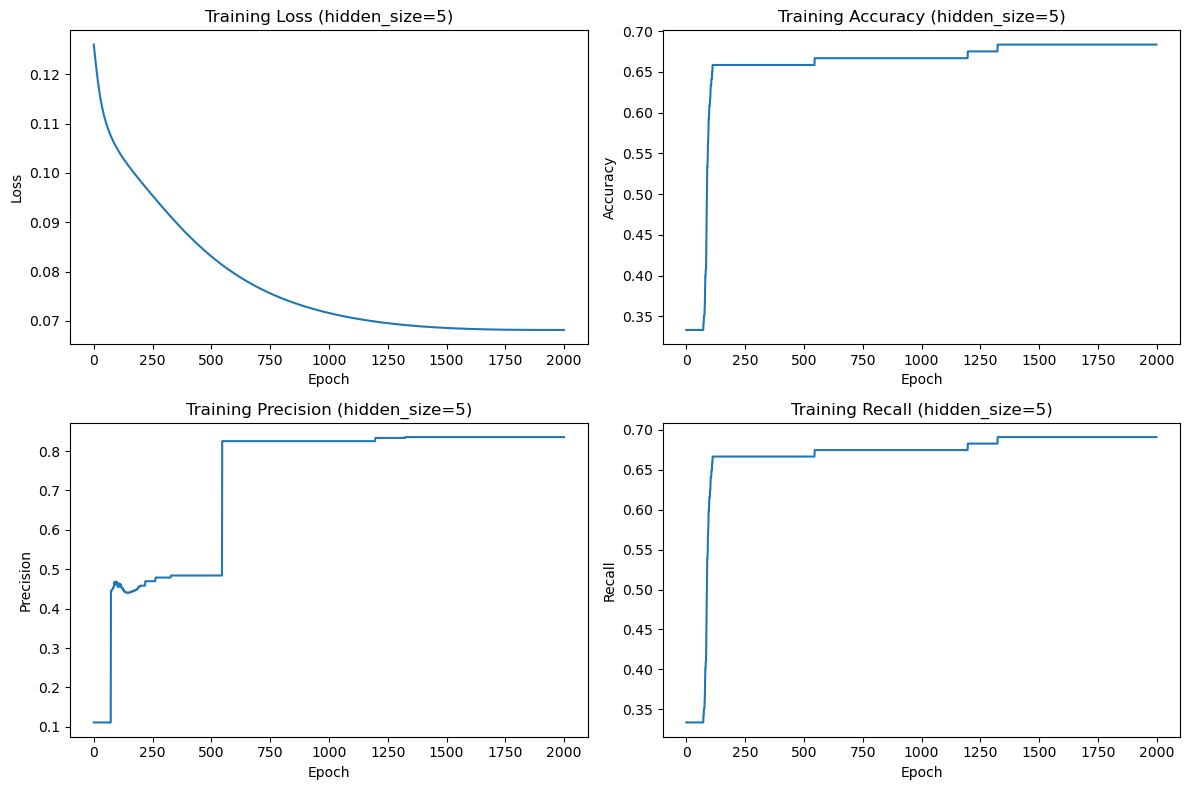

Epoch 0, Loss: 0.1650333323134081, Accuracy: 0.3416666666666667, Precision: 0.11388888888888889, Recall: 0.3333333333333333
Epoch 100, Loss: 0.09260312680390718, Accuracy: 0.675, Precision: 0.5041666666666667, Recall: 0.6666666666666666
Epoch 200, Loss: 0.08327422238493457, Accuracy: 0.675, Precision: 0.5041666666666667, Recall: 0.6666666666666666
Epoch 300, Loss: 0.07559493216182361, Accuracy: 0.7333333333333333, Precision: 0.8538812785388128, Recall: 0.7264957264957265
Epoch 400, Loss: 0.06959108237603122, Accuracy: 0.8, Precision: 0.825069921179761, Recall: 0.796539503856577
Epoch 500, Loss: 0.06515361864994573, Accuracy: 0.875, Precision: 0.8819444444444445, Recall: 0.873462580779654
Epoch 600, Loss: 0.061842075171866066, Accuracy: 0.925, Precision: 0.9249999999999999, Recall: 0.9251615593079007
Epoch 700, Loss: 0.05929631823372499, Accuracy: 0.9166666666666666, Precision: 0.9187094070815002, Recall: 0.9174484052532833
Epoch 800, Loss: 0.05727961949619051, Accuracy: 0.9333333333333

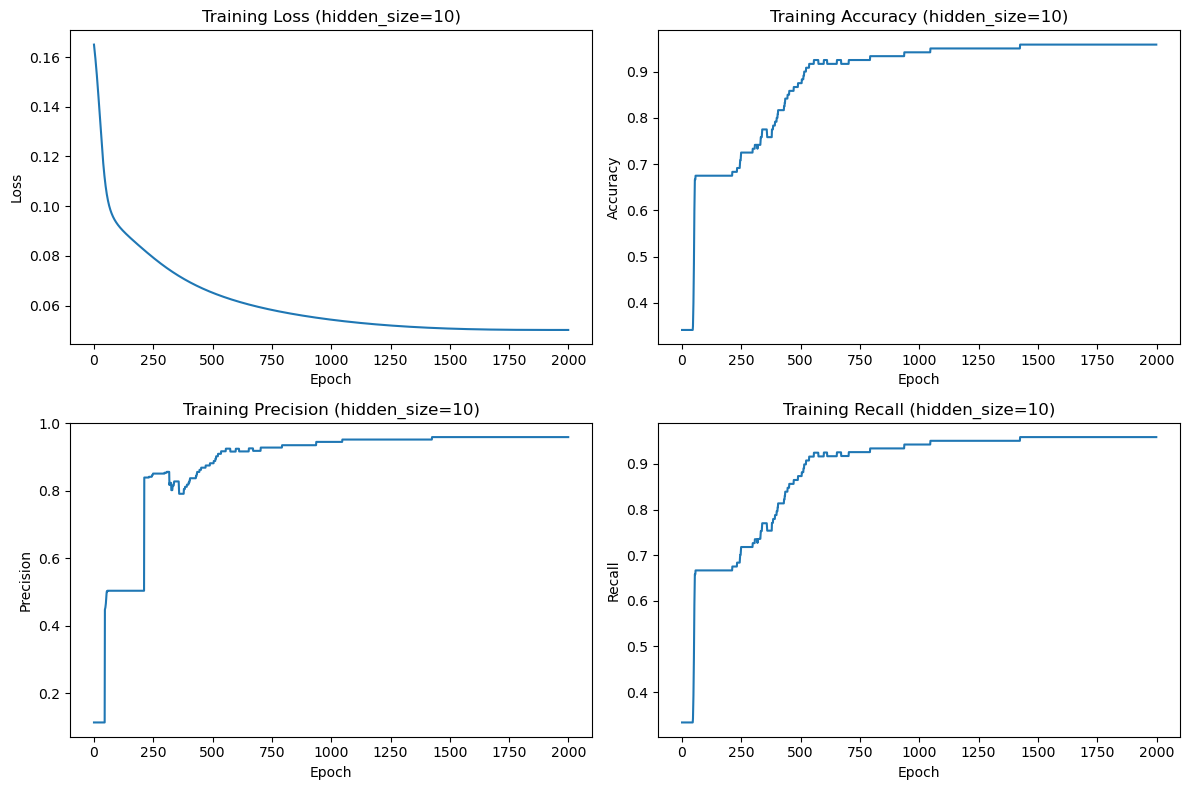

Epoch 0, Loss: 0.17798669669867065, Accuracy: 0.3333333333333333, Precision: 0.1111111111111111, Recall: 0.3333333333333333
Epoch 100, Loss: 0.07888376917412382, Accuracy: 0.6666666666666666, Precision: 0.4939796233405372, Recall: 0.6585365853658537
Epoch 200, Loss: 0.06488430242878117, Accuracy: 0.975, Precision: 0.975, Recall: 0.9751928288513655
Epoch 300, Loss: 0.05776305939927272, Accuracy: 0.9166666666666666, Precision: 0.9319727891156463, Recall: 0.9186991869918698
Epoch 400, Loss: 0.05341569418823967, Accuracy: 0.925, Precision: 0.9375, Recall: 0.9268292682926829
Epoch 500, Loss: 0.050410525100625284, Accuracy: 0.95, Precision: 0.9555555555555556, Recall: 0.9512195121951219
Epoch 600, Loss: 0.04810147765183969, Accuracy: 0.9583333333333334, Precision: 0.962121212121212, Recall: 0.959349593495935
Epoch 700, Loss: 0.046201013416812604, Accuracy: 0.9583333333333334, Precision: 0.962121212121212, Recall: 0.959349593495935
Epoch 800, Loss: 0.0445827209831806, Accuracy: 0.958333333333

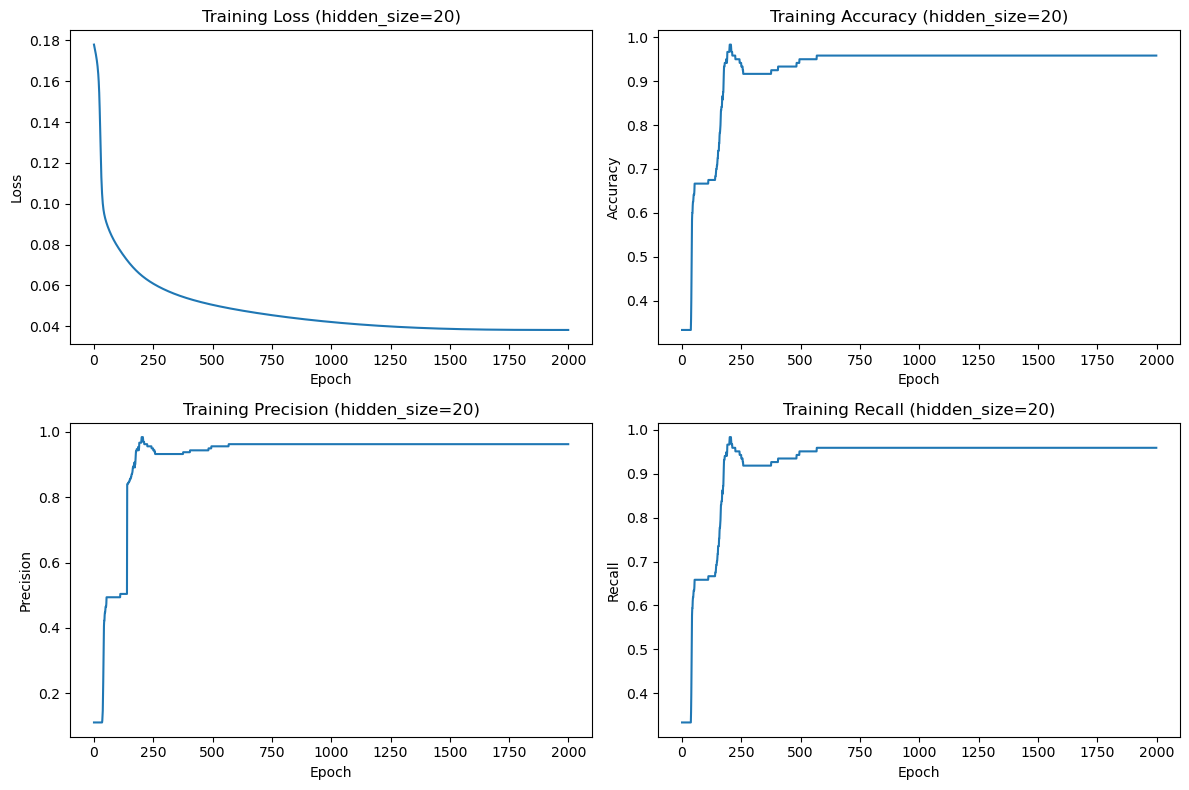

In [12]:
# 调整隐藏层数量
for hidden_size in [5, 10, 20]:
    # 初始化权重
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    # 训练模型
    losses = []
    accuracies = []
    precisions = []
    recalls = []

    for epoch in range(epochs):
        # 动态调整学习率
        learning_rate = cosine_annealing(epoch, epochs, initial_lr)
        
        # 前向传播
        z1, a1, z2, a2 = forward(X_train)
        loss = 0.5 * np.mean((y_train - a2) ** 2)
        losses.append(loss)
        
        y_pred_train = np.argmax(a2, axis=1)
        y_true_train = np.argmax(y_train, axis=1)
        
        accuracy = accuracy_score(y_true_train, y_pred_train)
        precision = precision_score(y_true_train, y_pred_train, average='macro', zero_division=0)
        recall = recall_score(y_true_train, y_pred_train, average='macro', zero_division=0)
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        
        # 反向传播
        backward(X_train, y_train, z1, a1, z2, a2)
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

    # 在测试集上评估模型
    z1, a1, z2, a2 = forward(X_test)
    y_pred_test = np.argmax(a2, axis=1)
    y_true_test = np.argmax(y_test, axis=1)

    test_accuracy = accuracy_score(y_true_test, y_pred_test)
    test_precision = precision_score(y_true_test, y_pred_test, average='macro', zero_division=0)
    test_recall = recall_score(y_true_test, y_pred_test, average='macro', zero_division=0)
    test_f1 = f1_score(y_true_test, y_pred_test, average='macro', zero_division=0)

    results.append({
        'hidden_size': hidden_size,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
    })
    
    # 可视化训练过程
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(losses)
    plt.title(f'Training Loss (hidden_size={hidden_size})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(2, 2, 2)
    plt.plot(accuracies)
    plt.title(f'Training Accuracy (hidden_size={hidden_size})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.subplot(2, 2, 3)
    plt.plot(precisions)
    plt.title(f'Training Precision (hidden_size={hidden_size})')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')

    plt.subplot(2, 2, 4)
    plt.plot(recalls)
    plt.title(f'Training Recall (hidden_size={hidden_size})')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')

    plt.tight_layout()
    plt.show()

Hidden Size: 5, Test Accuracy: 0.7333333333333333, Test Precision: 0.8596491228070176, Test Recall: 0.7037037037037037, Test F1-score: 0.6444444444444444
Hidden Size: 10, Test Accuracy: 0.9333333333333333, Test Precision: 0.9326599326599326, Test Recall: 0.9326599326599326, Test F1-score: 0.9326599326599326
Hidden Size: 20, Test Accuracy: 1.0, Test Precision: 1.0, Test Recall: 1.0, Test F1-score: 1.0


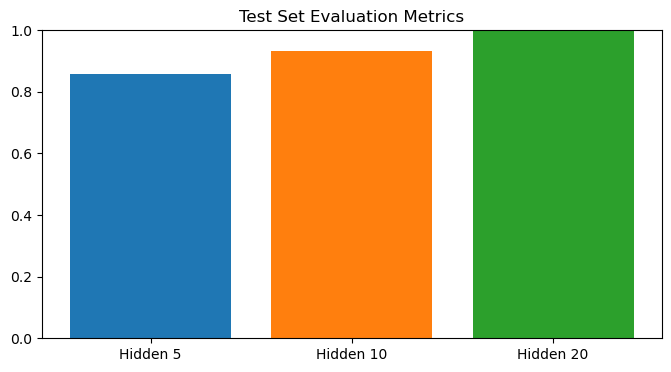

In [13]:
# 可视化测试集结果
for result in results:
    print(f"Hidden Size: {result['hidden_size']}, Test Accuracy: {result['test_accuracy']}, Test Precision: {result['test_precision']}, Test Recall: {result['test_recall']}, Test F1-score: {result['test_f1']}")

plt.figure(figsize=(8, 4))
for result in results:
    plt.bar(f"Hidden {result['hidden_size']}", [result['test_accuracy'], result['test_precision'], result['test_recall'], result['test_f1']])
plt.title('Test Set Evaluation Metrics')
plt.ylim(0, 1)
plt.show()